## Exploratory Data Analysis (EDA)

<div style="text-align:center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrsi6o2V4BwJxpMA3Xf5TOEhh9Qc7CMYW7RVN7MOHlP-k4he2vGePZzrlL37edt9ZWEVk&usqp=CAU" alt="A Comment Jpeg" width="500" height="250">
</div>

In this section, I will explore the production dataset to uncover patterns, relationships, and trends that provide insights into well performance and production efficiency. Key areas of focus include analyzing the Gas-Oil Ratio (GOR) over time, examining the impact of operational parameters, and identifying factors that influence production output.

By visualizing and analyzing this data, I aim to highlight important trends and variables that contribute to optimal production practices.

### Importing Dependencies

In [7]:
### Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [9]:
file_path = '../pvt_Data/cleaned_production_data.csv'

production_data_cleaned = pd.read_csv(file_path)

# Display the first few rows of the dataset
production_data_cleaned.head()

,Date of Production,Wellbore name,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE,Calculated_GOR
0,2013-08-19,15/9-F-11 H,24.0,266.027,105.982,175.275,23.008,9.86604,90.752,60.084,62.490,1047.0,158557.0,59.0,production,OP,151.439351
1,2013-08-20,15/9-F-11 H,24.0,266.560,105.978,175.553,23.037,9.81311,91.007,59.501,62.765,1024.0,156092.0,59.0,production,OP,152.433594
2,2013-08-21,15/9-F-11 H,24.0,266.430,105.995,175.574,23.650,10.10168,90.856,59.891,62.611,1050.0,160103.0,60.0,production,OP,152.479048
3,2013-08-22,15/9-F-11 H,24.0,266.419,106.012,175.626,23.811,10.02474,90.793,60.815,62.550,1045.0,158665.0,62.0,production,OP,151.832536
4,2013-08-23,15/9-F-11 H,24.0,266.416,106.025,175.638,24.032,10.08765,90.778,60.124,62.539,1039.0,159071.0,59.0,production,OP,153.100096


In [10]:
production_data_cleaned.shape

(3805, 17)

### Statistical Analysis of Key Production Metrics

In [12]:
production_data_cleaned.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,Calculated_GOR
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000
mean,23.257167,243.436223,103.927184,198.052434,18.394310,56.777659,45.383800,73.828827,16.676480,1271.913535,186411.860447,1628.546649,151.511992
std,3.003400,22.904889,3.807637,26.606806,5.114288,36.868552,19.581711,18.123137,17.939127,1444.632630,204607.397273,1462.036071,10.297498
min,0.630000,96.609000,39.554000,62.578000,0.001000,1.443510,1.030000,7.037000,0.584000,4.000000,856.000000,-59.000000,18.492611
25%,24.000000,222.229000,100.176000,172.276000,14.348000,16.157780,30.967000,67.638000,2.793000,225.000000,34721.000000,140.000000,145.792969
50%,24.000000,248.072000,105.866000,194.590000,19.072000,54.868610,34.373000,80.850000,6.503000,777.000000,119665.000000,1370.000000,150.560538
75%,24.000000,261.680000,106.442000,223.443000,22.134000,100.000000,58.029000,87.212000,26.412000,1335.000000,202059.000000,3129.000000,156.861169
max,25.000000,308.056000,107.508000,257.434000,30.020000,100.000000,120.889000,92.071000,92.475000,5889.000000,835981.000000,8020.000000,257.500000


> The table above provides a summary of the descriptive statistics for key production metrics in the dataset. This analysis includes insights into the central tendency, spread, and range of each variable.

### Observations:
- **ON_STREAM_HRS**: The majority of wells have close to 24 hours of production time, with minimal variation.
- **AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE**: These values are consistent, indicating stable conditions across wells.
- **AVG_CHOKE_SIZE_P**: Shows a wide range, which may suggest varying operational settings or production control measures across different wells.
- **Calculated_GOR**: The Gas-Oil Ratio (GOR) has a mean of 151.51, with some wells reaching up to 257.5, which could be indicative of specific reservoir characteristics or production techniques.

This statistical overview provides a baseline understanding of the dataset, highlighting key areas for potential in-depth analysis.

### Time-Based Analysis

To understand the temporal dynamics of Gas-Oil Ratio (GOR), I will explore how GOR varies over time. This analysis will help identify any trends or seasonal patterns in GOR values across different years and months. Additionally, I will examine the distribution of production dates to determine if there are specific periods with higher production activity.

In [19]:
# Convert 'Date of Production' to datetime format
production_data_cleaned['Date of Production'] = pd.to_datetime(production_data_cleaned['Date of Production'])

# Extract year and month for trend analysis
production_data_cleaned['Year'] = production_data_cleaned['Date of Production'].dt.year
production_data_cleaned['Month'] = production_data_cleaned['Date of Production'].dt.month

In [21]:
production_data_cleaned.sample(2)

,Date of Production,Wellbore name,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE,Calculated_GOR,Year,Month
807,2015-12-01,15/9-F-11 H,24.0,220.419,106.049,188.469,10.792,100.00000,31.95,80.359,4.446,1191.0,182249.0,1917.0,production,OP,153.021830,2015,12
942,2016-04-14,15/9-F-11 H,24.0,244.892,105.756,216.862,22.723,99.99484,28.03,81.355,2.512,571.0,93259.0,2249.0,production,OP,163.325744,2016,4


In [23]:
# Resample to yearly averages using 'YE' for end of the year
yearly_gor = production_data_cleaned.resample('YE', on='Date of Production').Calculated_GOR.mean().reset_index()
yearly_gor.columns = ['Date', 'Average_GOR']

# Print the yearly averages
print("Yearly Average GOR Values:\n", yearly_gor)

Yearly Average GOR Values:
         Date  Average_GOR
0 2008-12-31   146.984200
1 2009-12-31   138.914169
2 2010-12-31   143.364147
3 2011-12-31          NaN
4 2012-12-31   155.442641
5 2013-12-31   155.095098
6 2014-12-31   153.006980
7 2015-12-31   149.680989
8 2016-12-31   160.192339


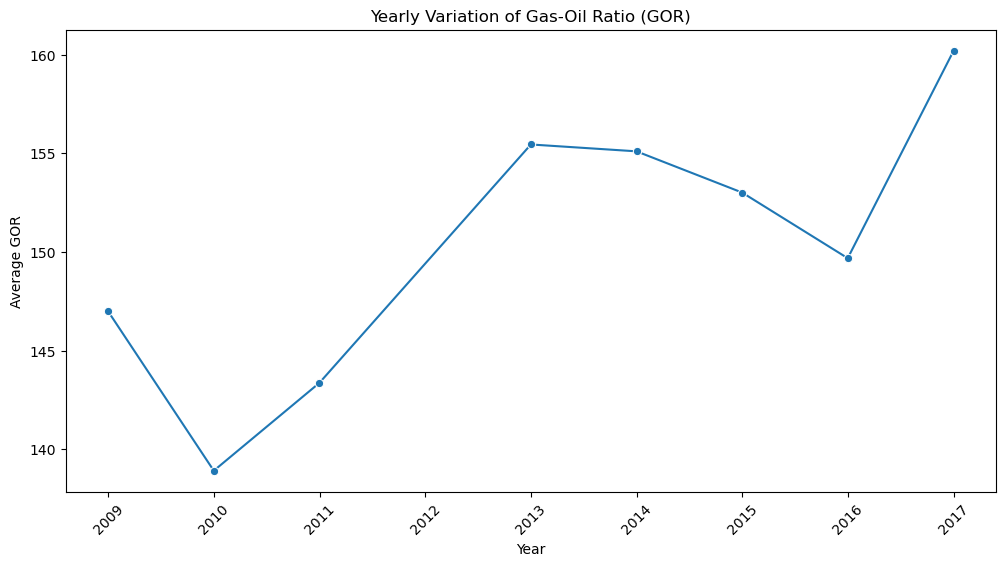

In [25]:
# Plot the yearly average GOR
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_gor, x='Date', y='Average_GOR', marker='o')
plt.title("Yearly Variation of Gas-Oil Ratio (GOR)")
plt.xlabel("Year")
plt.ylabel("Average GOR")
plt.xticks(rotation=45)
plt.show()

### Yearly Average Gas-Oil Ratio (GOR) Insights

The analysis of the yearly average GOR from 2008 to 2016 reveals the following trends:

- **2008:** The average GOR was relatively high at **146.98**.
- **2009:** A noticeable decrease to **138.91** indicates a downward trend.
- **2010:** The average GOR slightly increased to **143.36**, suggesting a recovery.
- **2011:** There is no recorded GOR value for this year, which might indicate a lack of production data.
- **2012:** The GOR rose significantly to **155.44**, marking one of the highest values in the observed period.
- **2013:** The average GOR remained stable at **155.10**, indicating consistency in production efficiency.
- **2014:** A slight decrease to **153.01** shows minor fluctuations in production dynamics.
- **2015:** The average GOR further decreased to **149.68**, continuing the downward trend.
- **2016:** An upward shift to **160.19** indicates improved performance in GOR during this year.

Overall, the GOR has fluctuated over the years, with notable peaks in 2012 and 2016, and a significant drop in 2009 and 2015.

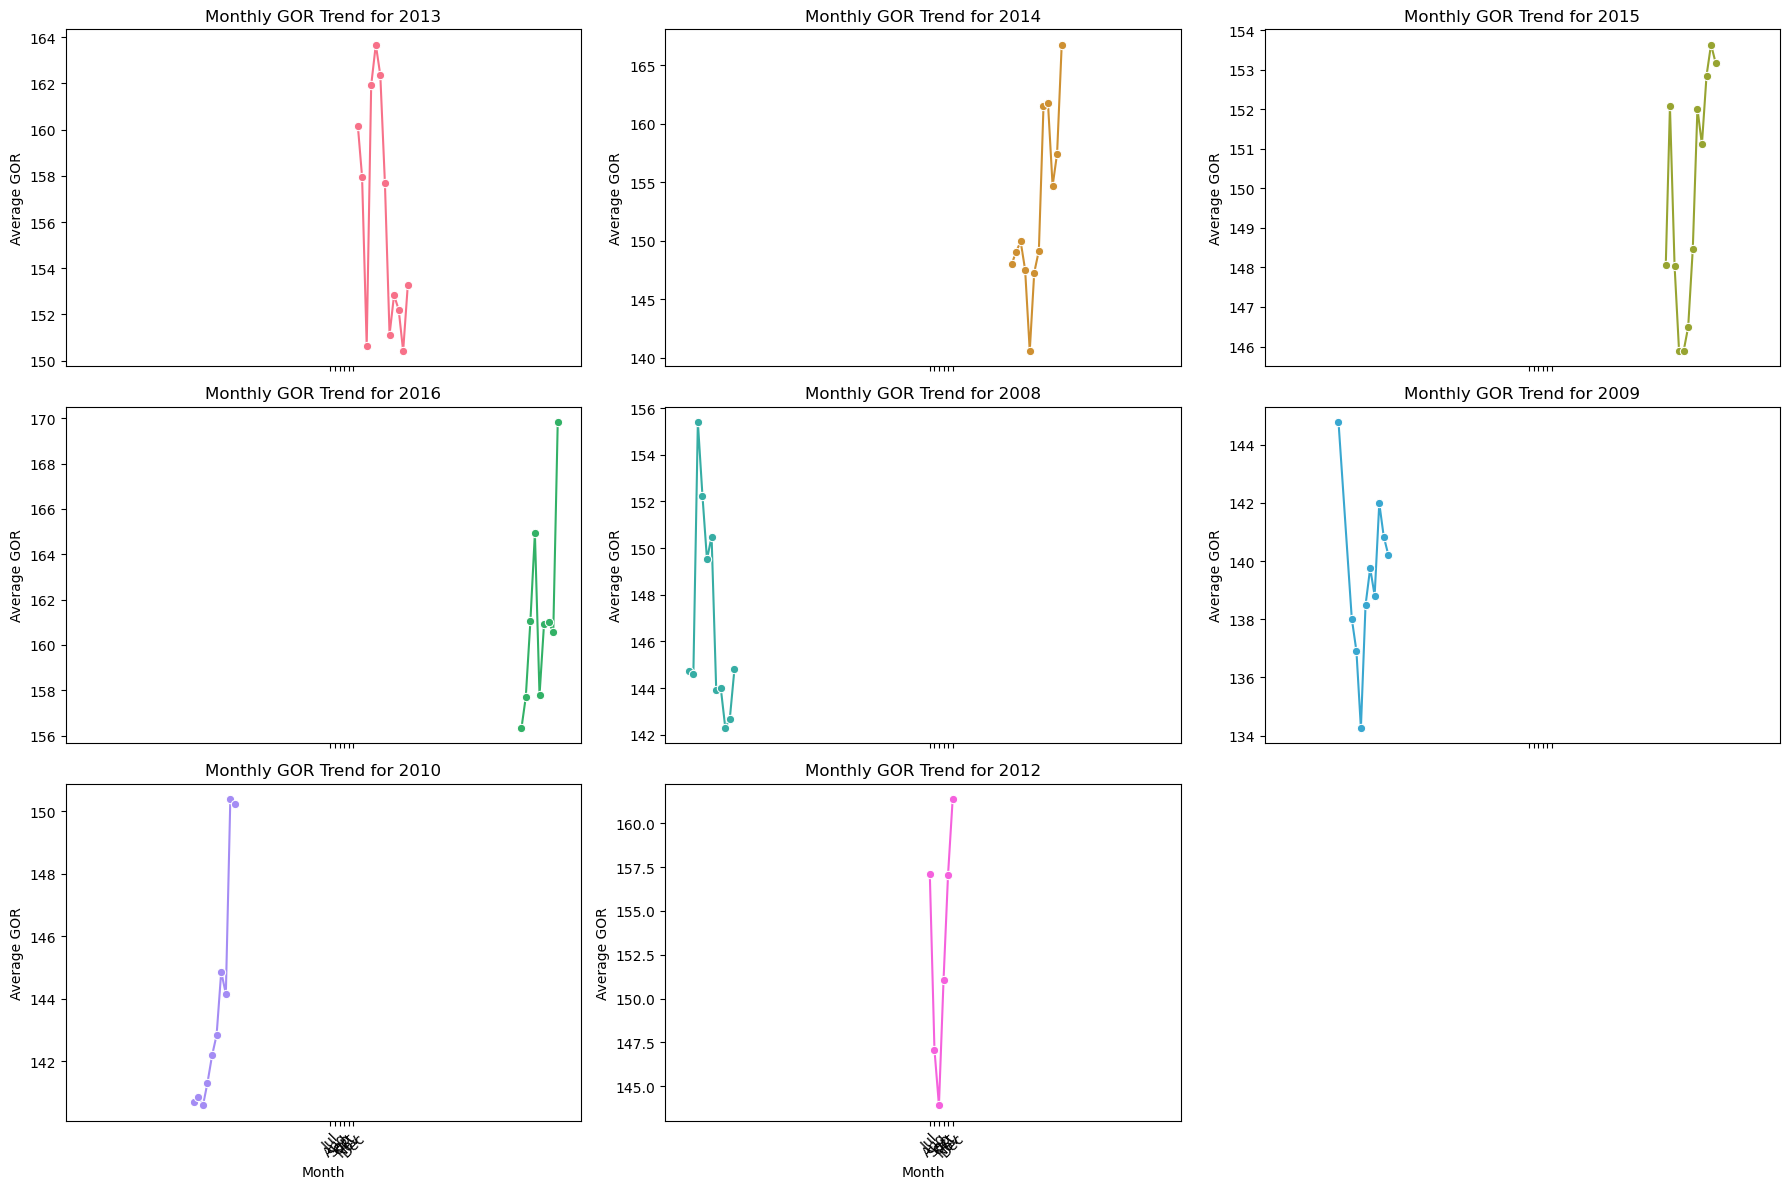

In [28]:
# Import required libraries for plotting if not already done
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Date of Production' to datetime if not done
production_data_cleaned['Date of Production'] = pd.to_datetime(production_data_cleaned['Date of Production'])

# Drop rows with NaN in Calculated_GOR
production_data_cleaned = production_data_cleaned.dropna(subset=['Calculated_GOR'])

# Extract the year from the 'Date of Production' for grouping
production_data_cleaned['Year'] = production_data_cleaned['Date of Production'].dt.year

# Get unique years
unique_years = production_data_cleaned['Year'].unique()

# Set the number of rows and columns for the grid
n_years = len(unique_years)
n_cols = 3  # Adjust number of columns for your layout
n_rows = (n_years + n_cols - 1) // n_cols  # Calculate rows needed

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a color palette
colors = sns.color_palette("husl", n_years)

# Initialize a dictionary to store monthly GOR values for each year
monthly_gor_summary = {}

# Loop through each year to create a plot
for idx, year in enumerate(unique_years):
    # Filter data for the specific year
    yearly_data = production_data_cleaned[production_data_cleaned['Year'] == year]
    
    # Calculate monthly averages for the year using 'ME' to avoid FutureWarning
    monthly_gor = yearly_data.resample('ME', on='Date of Production').Calculated_GOR.mean().reset_index()
    
    # Store monthly GOR values in the summary dictionary
    monthly_gor_summary[year] = monthly_gor[['Date of Production', 'Calculated_GOR']]

    # Plotting with different colors
    sns.lineplot(data=monthly_gor, x='Date of Production', y='Calculated_GOR', ax=axes[idx], marker='o', color=colors[idx])
    axes[idx].set_title(f"Monthly GOR Trend for {year}")
    axes[idx].set_xlabel("Month")
    axes[idx].set_ylabel("Average GOR")
    
    # Set x-ticks to show month names
    axes[idx].set_xticks(monthly_gor['Date of Production'])
    axes[idx].set_xticklabels(monthly_gor['Date of Production'].dt.strftime('%b'), rotation=45)

# Remove empty subplots if any
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Summary of Monthly GOR Trends

#### Seasonal Patterns Observed

1. **2013-2015:** 
   - The GOR values exhibited mild seasonal fluctuations, with peaks typically occurring in the mid-year months (May to August). This suggests a potential seasonal impact on production efficiency, possibly linked to operational adjustments during warmer months.

2. **2014:**
   - Notable peaks in August and December indicate that production may be optimized during these months, suggesting improved extraction techniques or increased operational focus.

3. **2016:**
   - A clear upward trend, particularly in the latter half of the year, highlights a significant improvement in production efficiency, with seasonal peaks also observed.

4. **2008-2012:**
   - Earlier years (2008-2010) showed more stable GOR values, while 2012 displayed notable fluctuations, particularly with a peak in December, hinting at seasonal variations in production strategies or external factors affecting output.

5. **Overall Observations:**
   - A recurring pattern appears where GOR values tend to peak during mid-year, suggesting seasonal influences on production activities. The peaks may correlate with operational adjustments in response to seasonal changes, market demand, or environmental conditions affecting extraction processes.


### Yearly Production Insights

Year
2008     294
2009     252
2010     266
2012     113
2013     473
2014     770
2015    1030
2016     607
Name: count, dtype: int64


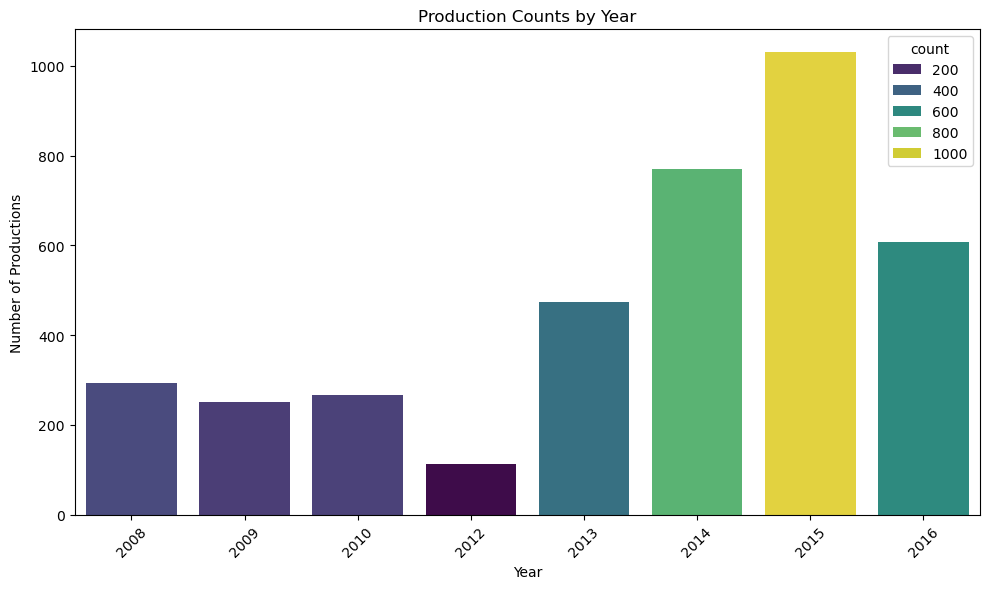

In [32]:
production_data_cleaned['Date of Production'] = pd.to_datetime(production_data_cleaned['Date of Production'])

# Extract the year from the 'Date of Production' for analysis
production_data_cleaned['Year'] = production_data_cleaned['Date of Production'].dt.year

yearly_production_count = production_data_cleaned['Year'].value_counts().sort_index()

print(yearly_production_count)

# Create a bar plot for production counts by year
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_production_count.index,hue=yearly_production_count, y=yearly_production_count.values, palette='viridis')
plt.title('Production Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Observations:** The data illustrates fluctuations in production activity over the years, with significant growth between 2013 and 2015, suggesting effective operational strategies during this period.

### Which well has the highest GOR?
> What factors might contribute to its performance?

Well with the highest GOR:
Wellbore Name: 15/9-F-14 H
Calculated GOR: 257.50
Total Oil Volume: 4.00 (units)
Total Gas Volume: 1030.00 (units)


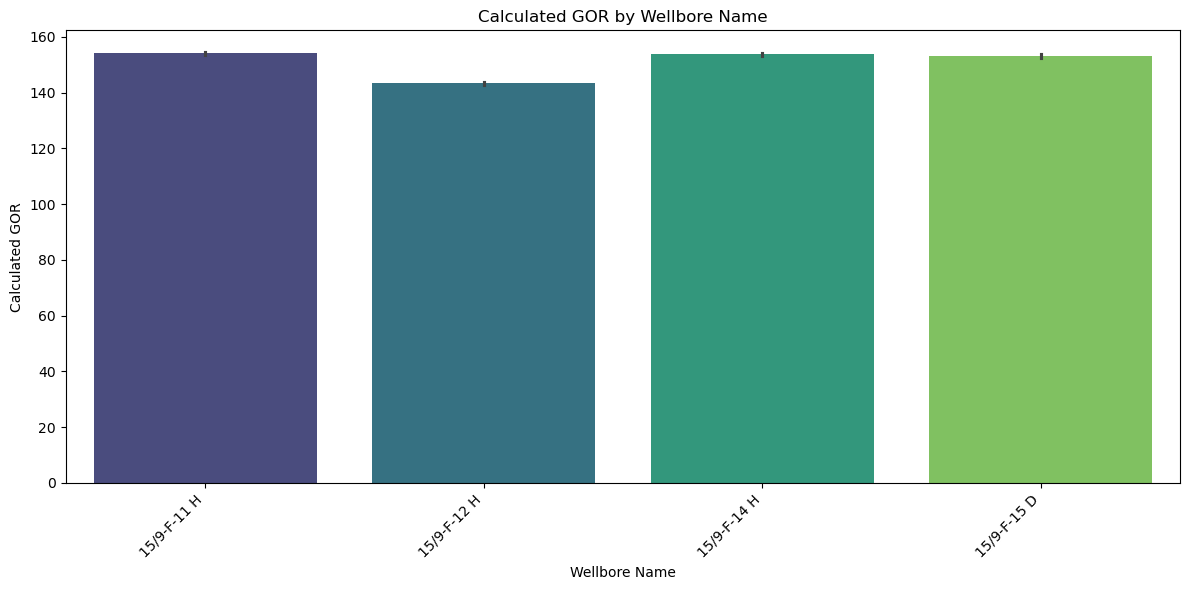

In [36]:
# Assuming production_data_cleaned is your DataFrame
# Calculate the well with the highest GOR
highest_gor_well = production_data_cleaned.loc[production_data_cleaned['Calculated_GOR'].idxmax()]

print("Well with the highest GOR:")
print(f"Wellbore Name: {highest_gor_well['Wellbore name']}")
print(f"Calculated GOR: {highest_gor_well['Calculated_GOR']:.2f}")
print(f"Total Oil Volume: {highest_gor_well['BORE_OIL_VOL']:.2f} (units)")
print(f"Total Gas Volume: {highest_gor_well['BORE_GAS_VOL']:.2f} (units)")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=production_data_cleaned, x='Wellbore name',hue = 'Wellbore name', y='Calculated_GOR', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Calculated GOR by Wellbore Name')
plt.xlabel('Wellbore Name')
plt.ylabel('Calculated GOR')
plt.tight_layout()
plt.show()

### How does the GOR relate to the total volume of oil and gas produced? 
> Is there a correlation between GOR and production volumes?

Correlation between GOR and Total Oil Volume: -0.42349464356351446
Correlation between GOR and Total Gas Volume: -0.3950917806654768
Correlation between GOR and Total Production Volume: -0.3952952759258379


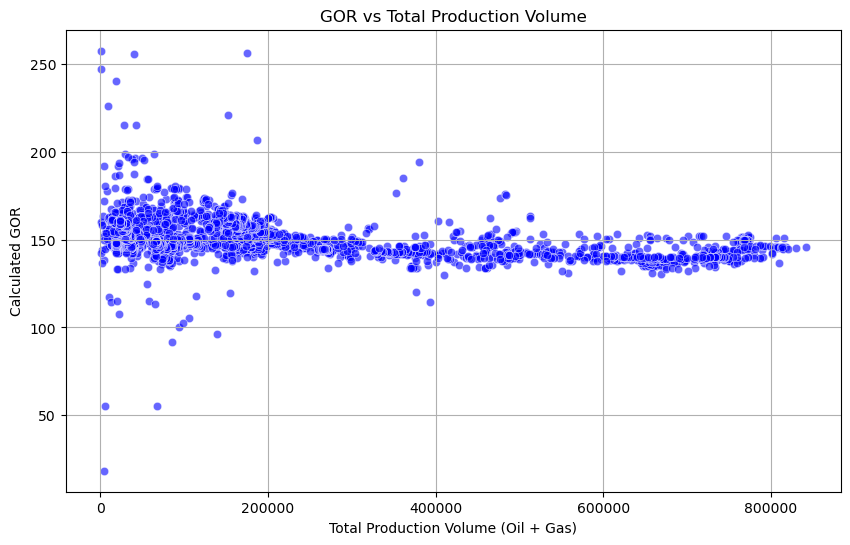

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming production_data_cleaned is your DataFrame
# Calculate total volumes
production_data_cleaned['Total_Production_Volume'] = production_data_cleaned['BORE_OIL_VOL'] + production_data_cleaned['BORE_GAS_VOL']

# Calculate correlation
correlation_gor_oil = production_data_cleaned['Calculated_GOR'].corr(production_data_cleaned['BORE_OIL_VOL'])
correlation_gor_gas = production_data_cleaned['Calculated_GOR'].corr(production_data_cleaned['BORE_GAS_VOL'])
correlation_gor_total = production_data_cleaned['Calculated_GOR'].corr(production_data_cleaned['Total_Production_Volume'])

# Print the correlation results
print("Correlation between GOR and Total Oil Volume:", correlation_gor_oil)
print("Correlation between GOR and Total Gas Volume:", correlation_gor_gas)
print("Correlation between GOR and Total Production Volume:", correlation_gor_total)

# Create a scatter plot for GOR vs Total Production Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=production_data_cleaned, x='Total_Production_Volume', y='Calculated_GOR', color='blue', alpha=0.6)
plt.title('GOR vs Total Production Volume')
plt.xlabel('Total Production Volume (Oil + Gas)')
plt.ylabel('Calculated GOR')
plt.grid()
plt.show()

In [42]:
# Step 1: Calculate Correlations
corr_downhole_pressure = production_data_cleaned['AVG_DOWNHOLE_PRESSURE'].corr(production_data_cleaned['Calculated_GOR'])
corr_downhole_temperature = production_data_cleaned['AVG_DOWNHOLE_TEMPERATURE'].corr(production_data_cleaned['Calculated_GOR'])
corr_annulus_pressure = production_data_cleaned['AVG_ANNULUS_PRESS'].corr(production_data_cleaned['Calculated_GOR'])

# Print correlations
print(f"Correlation between Average Downhole Pressure and GOR: {corr_downhole_pressure}")
print(f"Correlation between Average Downhole Temperature and GOR: {corr_downhole_temperature}")
print(f"Correlation between Average Annulus Pressure and GOR: {corr_annulus_pressure}")


Correlation between Average Downhole Pressure and GOR: 0.03994694360284239
Correlation between Average Downhole Temperature and GOR: -0.18050924493373793
Correlation between Average Annulus Pressure and GOR: 0.0667517088730184


#### Visualize Downhole Pressure Impact

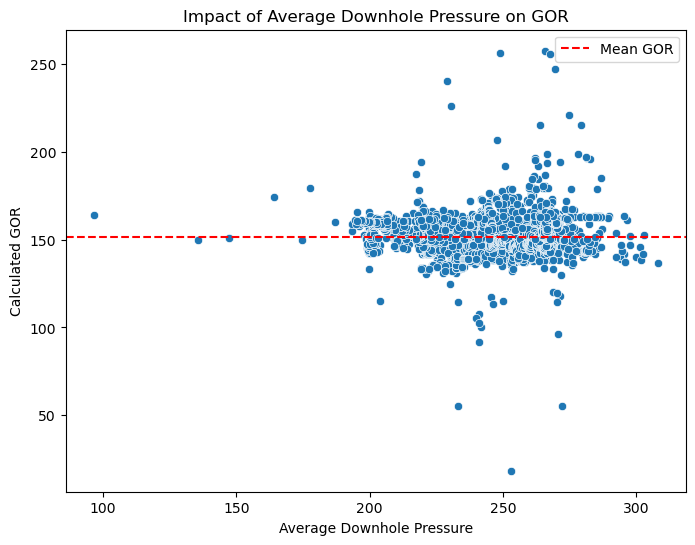

In [45]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=production_data_cleaned, x='AVG_DOWNHOLE_PRESSURE', y='Calculated_GOR')
plt.title('Impact of Average Downhole Pressure on GOR')
plt.xlabel('Average Downhole Pressure')
plt.ylabel('Calculated GOR')
plt.axhline(y=production_data_cleaned['Calculated_GOR'].mean(), color='r', linestyle='--', label='Mean GOR')
plt.legend()
plt.show()


#### Visualize Downhole Temperature Impact

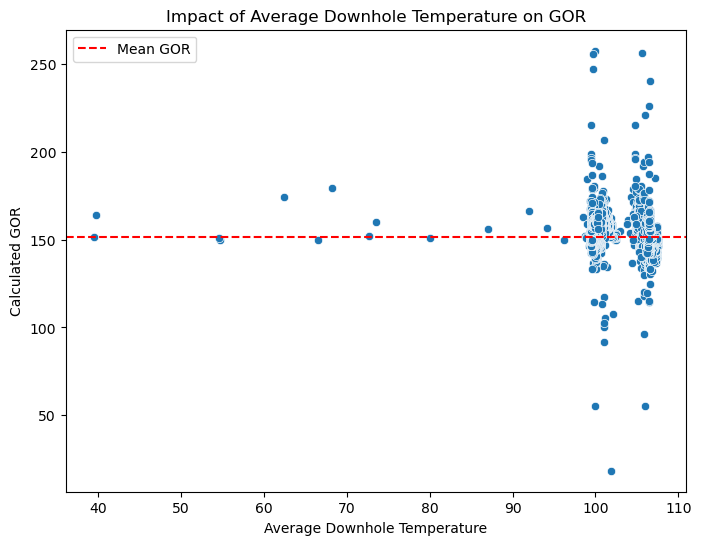

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=production_data_cleaned, x='AVG_DOWNHOLE_TEMPERATURE', y='Calculated_GOR')
plt.title('Impact of Average Downhole Temperature on GOR')
plt.xlabel('Average Downhole Temperature')
plt.ylabel('Calculated GOR')
plt.axhline(y=production_data_cleaned['Calculated_GOR'].mean(), color='r', linestyle='--', label='Mean GOR')
plt.legend()
plt.show()

In [50]:
# Step 4: Analyze Optimal Pressure and Temperature Ranges
optimal_pressure_range = production_data_cleaned[(production_data_cleaned['AVG_DOWNHOLE_PRESSURE'] > 100) & 
                                                (production_data_cleaned['AVG_DOWNHOLE_PRESSURE'] < 200)]

optimal_temperature_range = production_data_cleaned[(production_data_cleaned['AVG_DOWNHOLE_TEMPERATURE'] > 50) & 
                                                   (production_data_cleaned['AVG_DOWNHOLE_TEMPERATURE'] < 100)]

#### Visualize Annulus Pressure Impact

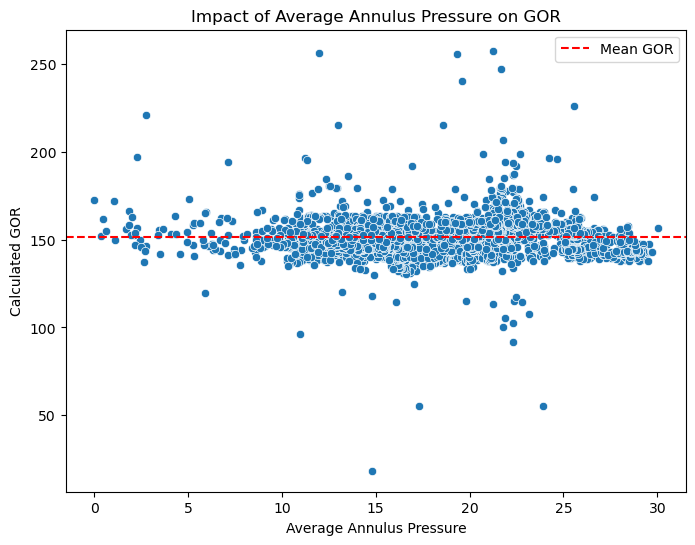

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=production_data_cleaned, x='AVG_ANNULUS_PRESS', y='Calculated_GOR')
plt.title('Impact of Average Annulus Pressure on GOR')
plt.xlabel('Average Annulus Pressure')
plt.ylabel('Calculated GOR')
plt.axhline(y=production_data_cleaned['Calculated_GOR'].mean(), color='r', linestyle='--', label='Mean GOR')
plt.legend()
plt.show()

### Insights 

1. **Correlation between Average Downhole Pressure and GOR**: 
   - **Value**: 0.0399
   - **Interpretation**: There is a very weak positive correlation between average downhole pressure and GOR. This suggests that variations in downhole pressure have minimal impact on GOR values.

2. **Correlation between Average Downhole Temperature and GOR**: 
   - **Value**: -0.1805
   - **Interpretation**: The negative correlation indicates a slight inverse relationship between average downhole temperature and GOR. As the temperature increases, GOR tends to decrease, although this relationship is weak.

3. **Correlation between Average Annulus Pressure and GOR**: 
   - **Value**: 0.0668
   - **Interpretation**: Similar to downhole pressure, the correlation between average annulus pressure and GOR is very weak and positive, indicating that changes in annulus pressure do not significantly influence GOR.

### Summary
Overall, the correlations suggest that average downhole pressure, average downhole temperature, and average annulus pressure have minimal influence on GOR values in the dataset.

### Operational Efficiency Insights

- **Average On-Stream Hours for Wells**: 23.26 hours
  
- **Correlation between On-Stream Hours and GOR**: -0.10

### Interpretation:
- The average on-stream hours for wells is approximately **23.26 hours**, indicating the typical operational time for these wells.
- The correlation between on-stream hours and GOR is **-0.10**, suggesting a weak negative relationship. This implies that as on-stream hours increase, GOR does not significantly change, indicating that on-stream hours may not be a strong factor influencing GOR.


In [59]:
average_on_stream_hours = production_data_cleaned['ON_STREAM_HRS'].mean()

# Print the average on-stream hours
print("Average On-Stream Hours for Wells:", average_on_stream_hours)

Average On-Stream Hours for Wells: 23.257166885676742


In [66]:
#Average On-Stream Hours for Wells: 23.257166885676742
# Calculate the correlation between on-stream hours and GOR
correlation_on_stream_gor = production_data_cleaned['ON_STREAM_HRS'].corr(production_data_cleaned['Calculated_GOR'])

# Print the correlation value
print("Correlation between On-Stream Hours and GOR:", correlation_on_stream_gor)

Correlation between On-Stream Hours and GOR: -0.1048666527980327


### Water Production Insights

- **Relationship Between Water Production and GOR**: 
  - Analyzing the volume of produced water in relation to GOR can help identify trends where increased water production might correlate with lower GOR values.

In [62]:
correlation_water_gor = production_data_cleaned['BORE_WAT_VOL'].corr(production_data_cleaned['Calculated_GOR'])
print(f"Correlation between Water Production and GOR: {correlation_water_gor}")

Correlation between Water Production and GOR: 0.15803946736895982


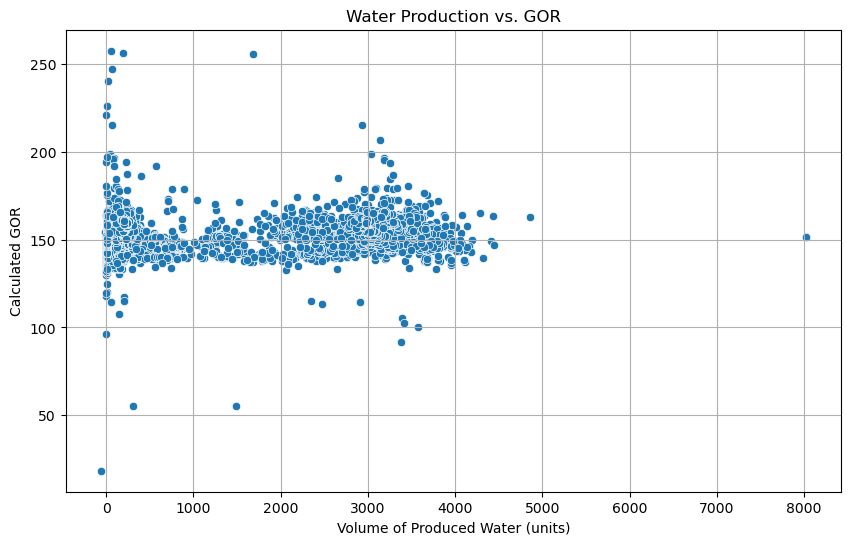

In [63]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=production_data_cleaned, x='BORE_WAT_VOL', y='Calculated_GOR')
plt.title('Water Production vs. GOR')
plt.xlabel('Volume of Produced Water (units)')
plt.ylabel('Calculated GOR')
plt.grid()
plt.show()

### Water Production Insights

- **Correlation Between Water Production and GOR**: 
  - The correlation coefficient between water production and GOR is **0.158**, suggesting a weak positive relationship. This indicates that as the volume of produced water increases, the GOR tends to increase slightly, but the relationship is not strong enough to draw definitive conclusions.